In [9]:
import os
import time
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [2]:
# write train.txt ,test.txt
dd=os.listdir('TIN0')
f1 = open('train.txt', 'w')
f2 = open('test.txt', 'w')
for i in range(len(dd)):
    d2 = os.listdir ('TIN0/%s/images/'%(dd[i]))
    for j in range(len(d2)-2):
        str1='TIN0/%s/images/%s'%(dd[i], d2[j])
        f1.write("%s %d\n" % (str1, i))
    str1='TIN0/%s/images/%s'%(dd[i], d2[-1])
    f2.write("%s %d\n" % (str1, i))

f1.close()
f2.close()

In [3]:
def load_img(f):
    f=open(f)
    lines=f.readlines()
    imgs, lab=[], []
    for i in range(len(lines)):
        fn, label = lines[i].split(' ')
        
        im1 = cv2.imread(fn)
        #im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
       
        imgs.append(im1)
        lab.append(int(label))
        
    imgs= np.asarray(imgs, np.float32)
    lab= np.asarray(lab, np.int32)
    return imgs, lab 

def load_img_BRISK(f, length):
    f=open(f)
    lines=f.readlines()
    imgs, lab=[], []
    max_length = length
    
    for i in range(len(lines)):
        fn, label = lines[i].split(' ')
        
        im1 = cv2.imread(fn)
        im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
        
        #===============================#
        
        # Get BRISK特徵
        im1_uint8 = im1.astype(np.uint8)
        brisk = cv2.BRISK_create()
        keypoints, descriptors = brisk.detectAndCompute(im1_uint8, None)
        
        # 檢查 descriptors是否為 none
        if descriptors is not None:  
            vec = descriptors.flatten()
            imgs.append(vec)
            lab.append(int(label))
            max_length = max(max_length, len(vec))  # 更新最大特徵向量 length
        
        #===============================#
        
    # 使不同長度的特徵向量相同
    imgs_cropped = []
    for vec in imgs:
        if len(vec) < max_length:
            vec = np.concatenate([vec, np.zeros(max_length - len(vec))])
        imgs_cropped.append(vec)
    imgs = np.asarray(imgs_cropped, dtype=np.float32)
    lab = np.asarray(lab, dtype=np.int32)
    
    # normalization
    scaler = StandardScaler()
    imgs = scaler.fit_transform(imgs)
        
    
    return imgs, lab 

def load_img_color_histogram(f):
    f=open(f)
    lines=f.readlines()
    imgs, lab=[], []
    for i in range(len(lines)):
        fn, label = lines[i].split(' ')
        
        im1 = cv2.imread(fn)
        im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
        
        #===============================#
        
        hist = cv2.calcHist([im1], [0], None, [256], [0, 256])
        hist = hist.flatten()
        
        #===============================#
        
        imgs.append(hist)
        lab.append(int(label))
        
    imgs= np.asarray(imgs, np.float32)
    lab= np.asarray(lab, np.int32)
    return imgs, lab 

def load_img_SIFT(f, length):
    f=open(f)
    lines=f.readlines()
    imgs, lab=[], []
    max_length = length
    
    for i in range(len(lines)):
        fn, label = lines[i].split(' ')
        
        im1 = cv2.imread(fn)
        im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
        
        #===============================#
        
        # Get SIFT特徵
        im1_uint8 = im1.astype(np.uint8)
        sift = cv2.SIFT_create()
        keypoints, descriptors = sift.detectAndCompute(im1_uint8, None)
        
        # 檢查 descriptors是否為 none
        if descriptors is not None:  
            vec = descriptors.flatten()
            imgs.append(vec)
            lab.append(int(label))
            max_length = max(max_length, len(vec))  # 更新最大特徵向量 length
        
        #===============================#
        
    # 使不同長度的特徵向量相同
    imgs_cropped = []
    for vec in imgs:
        if len(vec) < max_length:
            vec = np.concatenate([vec, np.zeros(max_length - len(vec))])
        imgs_cropped.append(vec)
    imgs = np.asarray(imgs_cropped, dtype=np.float32)
    lab = np.asarray(lab, dtype=np.int32)
    
    # normalization
    scaler = StandardScaler()
    imgs = scaler.fit_transform(imgs)
        
    
    return imgs, lab 

def shuffle_2arrays(arr1, arr2):
    # 隨機索引排列
    indices = np.random.permutation(len(arr1))
    
    # 相同順序之亂數索引對兩ndarray進行重新排列
    shuffled_arr1 = arr1[indices]
    shuffled_arr2 = arr2[indices]
    
    return shuffled_arr1, shuffled_arr2

def split_data(data):
    
    x = data[:9360]
    y = data[9360:]
    
    return x, y


In [4]:
time_0 = time.time()
x, y = load_img('train.txt')
test_x, test_y= load_img('test.txt')
time_1 = time.time()
t = time_1 - time_0
print(f'time(s) = {t}')

time(s) = 0.899195671081543


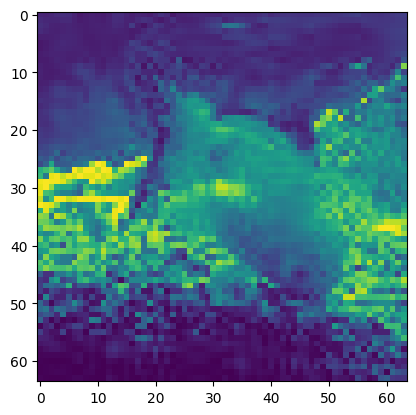

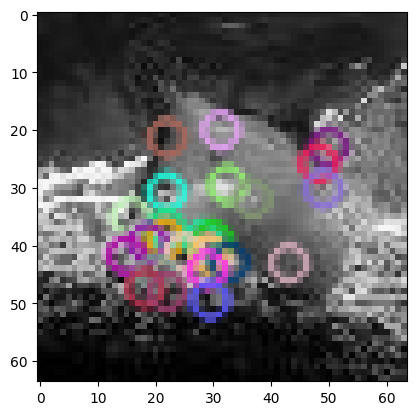

In [5]:
# BRISK DEMO
# 圖片轉灰階
img = cv2.cvtColor(x[1], cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show()
img = img.astype(np.uint8)

# 建立 BRISK 
brisk = cv2.BRISK_create()

# 偵測 keypoints, descriptors
keypoints, descriptors = brisk.detectAndCompute(img, None)

# output keypoints
output_image = cv2.drawKeypoints(img, keypoints, None)
plt.imshow(output_image)
plt.show()

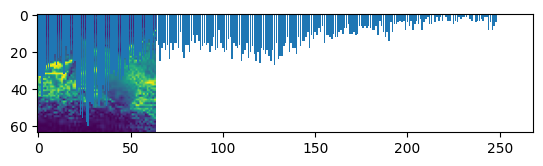

In [6]:
# Color Histogram DEMO

# 圖片轉灰階
img = cv2.cvtColor(x[1], cv2.COLOR_BGR2GRAY)
plt.imshow(img)  

# 計算直方圖每個 bin的數值
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# plot直方圖
plt.bar(range(256), hist.flatten())
plt.show()

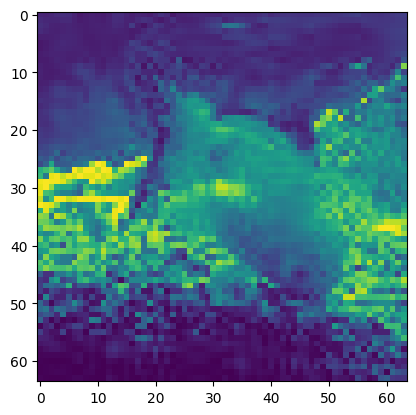

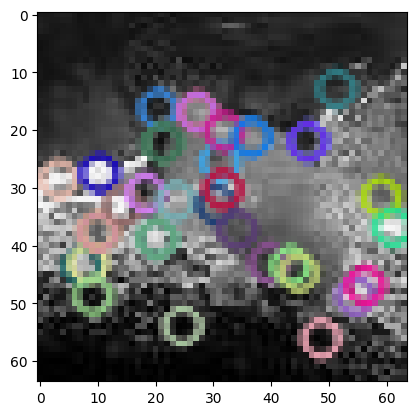

In [7]:
# SIFT DEMO
# 圖轉灰階
img = cv2.cvtColor(x[1], cv2.COLOR_BGR2GRAY)
plt.imshow(img) 
plt.show()
im1_uint8 = img.astype(np.uint8)

# 建立SIFT
sift = cv2.SIFT_create()

# 偵測 keypoints, descriptors
keypoints, descriptors = sift.detectAndCompute(im1_uint8, None)

# output keypoints
image_with_keypoints = cv2.drawKeypoints(im1_uint8, keypoints, None)
plt.imshow(image_with_keypoints)
plt.show()

In [37]:
# check dim確認最大特徵長度 / BRISK
x_BRISK, y_BRISK = load_img_BRISK('train.txt', 0)
test_x_BRISK, test_y_BRISK = load_img_BRISK('test.txt', 0)

print(x_BRISK.shape)
print(test_x_BRISK.shape)

(9850, 6592)
(20, 4928)


In [4]:
# check dim確認最大特徵長度 / SIFT
x_SIFT, y_SIFT = load_img_SIFT('train.txt', 0)
test_x_SIFT, test_y_SIFT = load_img_SIFT('test.txt', 0)

print(x_SIFT.shape)
print(test_x_SIFT.shape)

(9943, 24704)
(20, 9728)


In [5]:
# Extract image features / SIFT
time_0 = time.time()
x_SIFT, y_SIFT = load_img_SIFT('train.txt', 0)

# 抓取 train data 之特徵長度
max_length = 0
for x in x_SIFT:
    length = len(x)
    max_length = max(max_length, length)

test_x_SIFT, test_y_SIFT = load_img_SIFT('test.txt', max_length)
time_1 = time.time()
t = time_1 - time_0
print(f'time(s) = {t}')

# split / SIFT

# 將 train data 順序打亂
x_SIFT, y_SIFT = shuffle_2arrays(x_SIFT, y_SIFT)

# 切割 train data為 trian, validation data
x_SIFT, validation_x_SIFT = split_data(x_SIFT)
y_SIFT, validation_y_SIFT = split_data(y_SIFT)

# check dim
print(f'x_SIFT:{x_SIFT.shape}')
print(f'validation_x_SIFT:{validation_x_SIFT.shape}')
print(f'test_x_SIFT:{test_x_SIFT.shape}')

time(s) = 14.20141077041626
x_SIFT:(9360, 24704)
validation_x_SIFT:(583, 24704)
test_x_SIFT:(20, 24704)


In [6]:
# Extract image features / color histogram
time_0 = time.time()
x_CH, y_CH = load_img_color_histogram('train.txt')
test_x_CH, test_y_CH = load_img_color_histogram('test.txt')
time_1 = time.time()
t = time_1 - time_0
print(f'time(s) = {t}')

# split / color histogram

# 將 train data 順序打亂
x_CH, y_CH = shuffle_2arrays(x_CH, y_CH)

# 切割 train data為 trian, validation data
x_CH, validation_x_CH = split_data(x_CH)
y_CH, validation_y_CH = split_data(y_CH)

# check dim
print(f'x_CH:{x_CH.shape}')
print(f'validation_x_CH:{validation_x_CH.shape}')
print(f'test_x_CH:{test_x_CH.shape}')

time(s) = 0.8662445545196533
x_CH:(9360, 256)
validation_x_CH:(600, 256)
test_x_CH:(20, 256)


In [7]:
# Extract image features / BRISK
time_0 = time.time()
x_BRISK, y_BRISK = load_img_BRISK('train.txt', 0)

# 抓取 train data 之特徵長度
max_length = 0
for x in x_BRISK:
    length = len(x)
    max_length = max(max_length, length)

test_x_BRISK, test_y_BRISK = load_img_BRISK('test.txt', max_length)
time_1 = time.time()
t = time_1 - time_0
print(f'BRISK : {t} (s)')

# split / BRISK

# 將 train data 順序打亂
x_BRISK, y_BRISK = shuffle_2arrays(x_BRISK, y_BRISK)

# 切割 train data為 trian, validation data
x_BRISK, validation_x_BRISK = split_data(x_BRISK)
y_BRISK, validation_y_BRISK = split_data(y_BRISK)

# check dim
print(f'x_BRISK:{x_BRISK.shape}')
print(f'validation_x_BRISK:{validation_x_BRISK.shape}')
print(f'test_x_BRISK:{test_x_BRISK.shape}')

BRISK : 154.14722323417664 (s)
x_BRISK:(9360, 6592)
validation_x_BRISK:(490, 6592)
test_x_BRISK:(20, 6592)


k = 1   ; train accuracy = 0.9998 ; validation accuracy = 0.0738 ; f1_acc = 0.0611 ; time = 36.6198 (s)
k = 3   ; train accuracy = 0.3987 ; validation accuracy = 0.0789 ; f1_acc = 0.0531 ; time = 35.4620 (s)
k = 5   ; train accuracy = 0.2639 ; validation accuracy = 0.0926 ; f1_acc = 0.0620 ; time = 35.6675 (s)
k = 7   ; train accuracy = 0.2045 ; validation accuracy = 0.1012 ; f1_acc = 0.0661 ; time = 36.0692 (s)
k = 9   ; train accuracy = 0.1752 ; validation accuracy = 0.0875 ; f1_acc = 0.0534 ; time = 35.6857 (s)
k = 11  ; train accuracy = 0.1591 ; validation accuracy = 0.0858 ; f1_acc = 0.0500 ; time = 35.6391 (s)
k = 13  ; train accuracy = 0.1429 ; validation accuracy = 0.0840 ; f1_acc = 0.0516 ; time = 35.8563 (s)
k = 15  ; train accuracy = 0.1364 ; validation accuracy = 0.0806 ; f1_acc = 0.0456 ; time = 35.2499 (s)
k = 17  ; train accuracy = 0.1263 ; validation accuracy = 0.0840 ; f1_acc = 0.0499 ; time = 35.5550 (s)
k = 19  ; train accuracy = 0.1213 ; validation accuracy = 0.0858

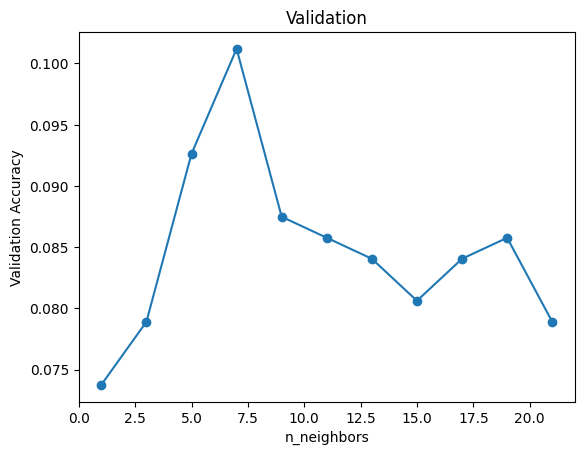

In [46]:
# KNN / SIFT / train.validation accuracy

k_values = []
accuracy = []
for i in range(11):
    clf = KNeighborsClassifier(n_neighbors= 2*i+1, weights='uniform', algorithm='auto', p=2)
    t_0 = time.time()
    clf.fit(x_SIFT, y_SIFT)
    pred = clf.predict(validation_x_SIFT)
    acc_train = clf.score(x_SIFT, y_SIFT)
    acc_val = clf.score(validation_x_SIFT, validation_y_SIFT)
    f1 = f1_score(validation_y_SIFT, pred, average='weighted')
    t_1 = time.time()
    t = t_1 - t_0
    print(f'k = {2*i+1:<3} ; train accuracy = {acc_train:.4f} ; validation accuracy = {acc_val:.4f} ; f1_acc = {f1:.4f} ; time = {t:.4f} (s)')
    k_values.append(2*i+1)
    accuracy.append(acc_val)

plt.plot(k_values, accuracy, marker='o', linestyle='-')
plt.title('Validation')
plt.xlabel('n_neighbors')
plt.ylabel('Validation Accuracy')
plt.show()

In [51]:
# KNN / SIFT / test accuracy
# a 根據 val acc

a = [7, 21]
for i in a:
    t_0 = time.time()
    clf = KNeighborsClassifier(n_neighbors= i, weights='uniform', algorithm='auto', p=2)
    clf.fit(x_SIFT, y_SIFT)
    pred = clf.predict(test_x_SIFT)
    acc = clf.score(test_x_SIFT, test_y_SIFT)
    f1 = f1_score(test_y_SIFT, pred, average='weighted')
    t_1 = time.time()
    t = t_1 - t_0
    print(f' n_neighbors = {i:<3} ; test accuracy = {acc:.4f} ; f1_acc = {f1:.4f} ; time = {t:.4f} (s)')

 n_neighbors = 7   ; test accuracy = 0.1500 ; f1_acc = 0.0750 ; time = 1.9075 (s)
 n_neighbors = 21  ; test accuracy = 0.1000 ; f1_acc = 0.0341 ; time = 1.8577 (s)


k = 3   ; train accuracy = 0.4197 ; validation accuracy = 0.1067 ; f1_acc = 0.0960 ; time = 1.8038 (s)
k = 5   ; train accuracy = 0.3397 ; validation accuracy = 0.1167 ; f1_acc = 0.1150 ; time = 2.2912 (s)
k = 7   ; train accuracy = 0.3096 ; validation accuracy = 0.1333 ; f1_acc = 0.1301 ; time = 2.3049 (s)
k = 9   ; train accuracy = 0.2799 ; validation accuracy = 0.1250 ; f1_acc = 0.1244 ; time = 2.3258 (s)
k = 11  ; train accuracy = 0.2600 ; validation accuracy = 0.1317 ; f1_acc = 0.1316 ; time = 2.3441 (s)
k = 13  ; train accuracy = 0.2481 ; validation accuracy = 0.1317 ; f1_acc = 0.1271 ; time = 2.3035 (s)
k = 15  ; train accuracy = 0.2423 ; validation accuracy = 0.1267 ; f1_acc = 0.1195 ; time = 2.3340 (s)
k = 17  ; train accuracy = 0.2322 ; validation accuracy = 0.1283 ; f1_acc = 0.1217 ; time = 2.3303 (s)
k = 19  ; train accuracy = 0.2212 ; validation accuracy = 0.1200 ; f1_acc = 0.1139 ; time = 2.2990 (s)
k = 21  ; train accuracy = 0.2155 ; validation accuracy = 0.1367 ; f1_acc

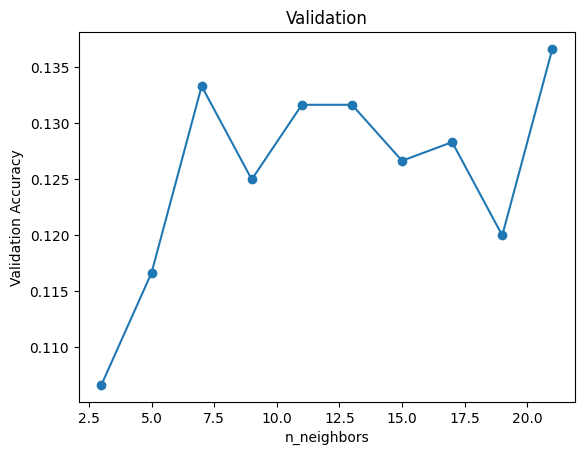

In [43]:
# KNN / color histogram / train.validation accuracy

k_values = []
accuracy = []
for i in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors= 2*i+1, weights='uniform', algorithm='auto', p=2)
    t_0 = time.time()
    clf.fit(x_CH, y_CH)
    pred = clf.predict(validation_x_CH)
    acc_train = clf.score(x_CH, y_CH)
    acc_val = clf.score(validation_x_CH, validation_y_CH)
    f1 = f1_score(validation_y_CH, pred, average='weighted')
    t_1 = time.time()
    t = t_1 - t_0
    print(f'k = {2*i+1:<3} ; train accuracy = {acc_train:.4f} ; validation accuracy = {acc_val:.4f} ; f1_acc = {f1:.4f} ; time = {t:.4f} (s)')
    k_values.append(2*i+1)
    accuracy.append(acc_val)

plt.plot(k_values, accuracy, marker='o', linestyle='-')
plt.title('Validation')
plt.xlabel('n_neighbors')
plt.ylabel('Validation Accuracy')
plt.show()

In [52]:
# KNN / color histogram / test accuracy
# a 根據 val acc

a = [7, 21]
for i in a:
    t_0 = time.time()
    clf = KNeighborsClassifier(n_neighbors= i, weights='uniform', algorithm='auto', p=2)
    clf.fit(x_CH, y_CH)
    pred = clf.predict(test_x_CH)
    acc = clf.score(test_x_CH, test_y_CH)
    f1 = f1_score(test_y_CH, pred, average='weighted')
    t_1 = time.time()
    t = t_1 - t_0
    print(f' n_neighbors = {i:<3} ; test accuracy = {acc:.4f} ; f1_acc = {f1:.4f} ; time = {t:.4f} (s)')

 n_neighbors = 7   ; test accuracy = 0.0500 ; f1_acc = 0.0500 ; time = 0.0313 (s)
 n_neighbors = 21  ; test accuracy = 0.0000 ; f1_acc = 0.0000 ; time = 0.0280 (s)


k = 3   ; train accuracy = 0.4611 ; validation accuracy = 0.1265 ; f1_acc = 0.1075 ; time = 9.6623 (s)
k = 5   ; train accuracy = 0.3329 ; validation accuracy = 0.1204 ; f1_acc = 0.0967 ; time = 10.3392 (s)
k = 7   ; train accuracy = 0.2776 ; validation accuracy = 0.1122 ; f1_acc = 0.0866 ; time = 10.2829 (s)
k = 9   ; train accuracy = 0.2546 ; validation accuracy = 0.1143 ; f1_acc = 0.0800 ; time = 10.3996 (s)
k = 11  ; train accuracy = 0.2373 ; validation accuracy = 0.1265 ; f1_acc = 0.0884 ; time = 10.3418 (s)
k = 13  ; train accuracy = 0.2232 ; validation accuracy = 0.1245 ; f1_acc = 0.0885 ; time = 10.1985 (s)
k = 15  ; train accuracy = 0.2156 ; validation accuracy = 0.1408 ; f1_acc = 0.0958 ; time = 10.1838 (s)
k = 17  ; train accuracy = 0.2048 ; validation accuracy = 0.1286 ; f1_acc = 0.0860 ; time = 10.0760 (s)
k = 19  ; train accuracy = 0.1995 ; validation accuracy = 0.1306 ; f1_acc = 0.0833 ; time = 10.2172 (s)
k = 21  ; train accuracy = 0.1955 ; validation accuracy = 0.1306 

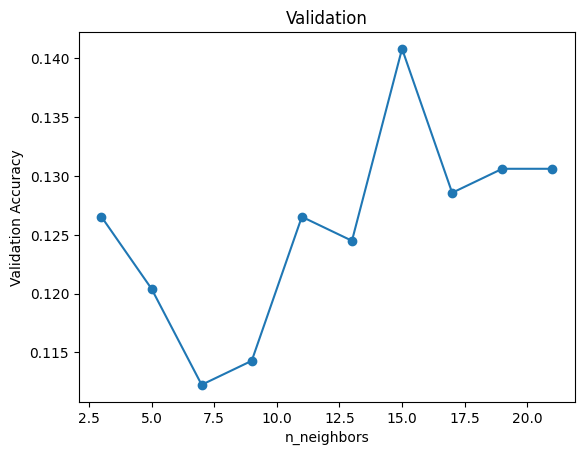

In [40]:
# KNN / BRISK / train.validation accuracy

k_values = []
accuracy = []
for i in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors= 2*i+1, weights='uniform', algorithm='auto', p=2)
    t_0 = time.time()
    clf.fit(x_BRISK, y_BRISK)
    pred = clf.predict(validation_x_BRISK)
    acc_train = clf.score(x_BRISK, y_BRISK)
    acc_val = clf.score(validation_x_BRISK, validation_y_BRISK)
    f1 = f1_score(validation_y_BRISK, pred, average='weighted')
    t_1 = time.time()
    t = t_1 - t_0
    
    print(f'k = {2*i+1:<3} ; train accuracy = {acc_train:.4f} ; validation accuracy = {acc_val:.4f} ; f1_acc = {f1:.4f} ; time = {t:.4f} (s)')
    k_values.append(2*i+1)
    accuracy.append(acc_val)

plt.plot(k_values, accuracy, marker='o', linestyle='-')
plt.title('Validation')
plt.xlabel('n_neighbors')
plt.ylabel('Validation Accuracy')
plt.show()

In [53]:
# KNN / BRISK / test accuracy
# a 根據 val acc

a = [15, 19, 21]
for i in a:
    t_0 = time.time()
    clf = KNeighborsClassifier(n_neighbors= i, weights='uniform', algorithm='auto', p=2)
    clf.fit(x_BRISK, y_BRISK)
    pred = clf.predict(test_x_BRISK)
    acc = clf.score(test_x_BRISK, test_y_BRISK)
    f1 = f1_score(test_y_CH, pred, average='weighted')
    t_1 = time.time()
    t = t_1 - t_0
    print(f' n_neighbors = {i:<3} ; test accuracy = {acc:.4f} ; f1_acc = {f1:.4f} ; time = {t:.4f} (s)')

 n_neighbors = 15  ; test accuracy = 0.0500 ; f1_acc = 0.0333 ; time = 0.4952 (s)
 n_neighbors = 19  ; test accuracy = 0.0500 ; f1_acc = 0.0250 ; time = 0.5256 (s)
 n_neighbors = 21  ; test accuracy = 0.0500 ; f1_acc = 0.0250 ; time = 0.4807 (s)


 n_estimators = 100 ; validation accuracy = 0.1458 ; f1_acc = 0.1341 ; time = 35.2731 (s)
 n_estimators = 101 ; validation accuracy = 0.1286 ; f1_acc = 0.1156 ; time = 36.2719 (s)
 n_estimators = 102 ; validation accuracy = 0.1458 ; f1_acc = 0.1304 ; time = 36.6564 (s)
 n_estimators = 103 ; validation accuracy = 0.1561 ; f1_acc = 0.1379 ; time = 36.5001 (s)
 n_estimators = 104 ; validation accuracy = 0.1252 ; f1_acc = 0.1148 ; time = 36.1775 (s)
 n_estimators = 105 ; validation accuracy = 0.1321 ; f1_acc = 0.1182 ; time = 36.6153 (s)
 n_estimators = 106 ; validation accuracy = 0.1355 ; f1_acc = 0.1184 ; time = 36.8930 (s)
 n_estimators = 107 ; validation accuracy = 0.1252 ; f1_acc = 0.1126 ; time = 37.0477 (s)
 n_estimators = 108 ; validation accuracy = 0.1492 ; f1_acc = 0.1305 ; time = 37.7640 (s)
 n_estimators = 109 ; validation accuracy = 0.1184 ; f1_acc = 0.1054 ; time = 37.9202 (s)
 n_estimators = 110 ; validation accuracy = 0.1355 ; f1_acc = 0.1245 ; time = 38.2822 (s)


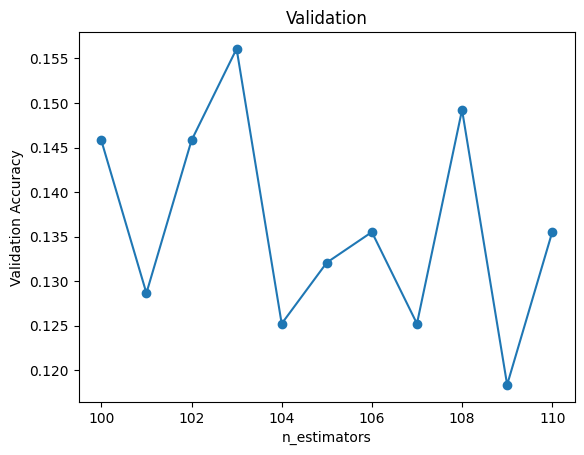

In [37]:
# rfc / SIFT / validation accuracy

k_values = []
accuracy = []

for i in range(100,111):
    t_0 = time.time()
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(x_SIFT, y_SIFT)
    pred = rfc.predict(validation_x_SIFT)
    acc = rfc.score(validation_x_SIFT,validation_y_SIFT)
    f1 = f1_score(validation_y_SIFT, pred, average='weighted')
    t_1 = time.time()
    t = t_1 - t_0
    print(f' n_estimators = {i:<3} ; validation accuracy = {acc:.4f} ; f1_acc = {f1:.4f} ; time = {t:.4f} (s)')
    k_values.append(i)
    accuracy.append(acc)

plt.plot(k_values, accuracy, marker='o', linestyle='-')
plt.title('Validation')
plt.xlabel('n_estimators')
plt.ylabel('Validation Accuracy')
plt.show()

In [50]:
# rfc / SIFT / test accuracy
# a 根據 val acc

a = [103, 108]
for i in a:
    t_0 = time.time()
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(x_SIFT, y_SIFT)
    pred = rfc.predict(test_x_SIFT)
    acc = rfc.score(test_x_SIFT, test_y_SIFT)
    f1 = f1_score(test_y_SIFT, pred, average='weighted')
    t_1 = time.time()
    t = t_1 - t_0
    print(f' n_estimators = {i:<3} ; test accuracy = {acc:.4f} ; f1_acc = {f1:.4f} ; time = {t:.4f} (s)')

 n_estimators = 103 ; test accuracy = 0.1000 ; f1_acc = 0.0533 ; time = 39.2927 (s)
 n_estimators = 108 ; test accuracy = 0.1500 ; f1_acc = 0.0950 ; time = 40.3677 (s)


 n_estimators = 100 ; validation accuracy = 0.1163 ; f1_acc = 0.0987 ; time = 19.5702 (s)
 n_estimators = 101 ; validation accuracy = 0.1204 ; f1_acc = 0.1088 ; time = 19.8066 (s)
 n_estimators = 102 ; validation accuracy = 0.1245 ; f1_acc = 0.1050 ; time = 20.0110 (s)
 n_estimators = 103 ; validation accuracy = 0.1163 ; f1_acc = 0.0971 ; time = 20.0027 (s)
 n_estimators = 104 ; validation accuracy = 0.1184 ; f1_acc = 0.1040 ; time = 20.7669 (s)
 n_estimators = 105 ; validation accuracy = 0.1388 ; f1_acc = 0.1193 ; time = 20.3477 (s)
 n_estimators = 106 ; validation accuracy = 0.1122 ; f1_acc = 0.1002 ; time = 20.5232 (s)
 n_estimators = 107 ; validation accuracy = 0.1367 ; f1_acc = 0.1199 ; time = 20.7749 (s)
 n_estimators = 108 ; validation accuracy = 0.1122 ; f1_acc = 0.0963 ; time = 20.8863 (s)
 n_estimators = 109 ; validation accuracy = 0.1245 ; f1_acc = 0.1025 ; time = 20.9558 (s)
 n_estimators = 110 ; validation accuracy = 0.1163 ; f1_acc = 0.1010 ; time = 22.0297 (s)


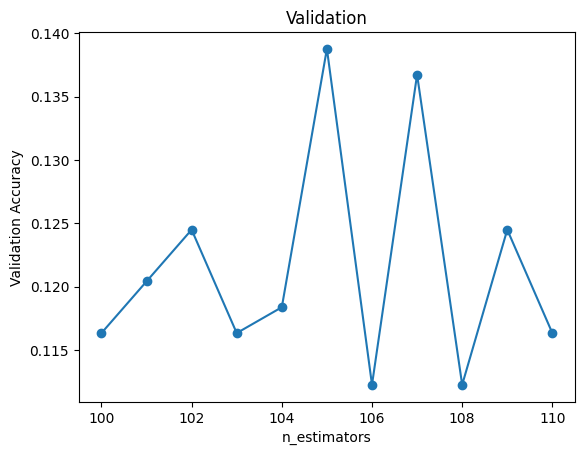

In [35]:
# rfc / BRISK / validation accuracy

k_values = []
accuracy = []

for i in range(100,111):
    t_0 = time.time()
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(x_BRISK, y_BRISK)
    pred = rfc.predict(validation_x_BRISK)
    acc = rfc.score(validation_x_BRISK,validation_y_BRISK)
    f1 = f1_score(validation_y_BRISK, pred, average='weighted')
    t_1 = time.time()
    t = t_1 - t_0
    print(f' n_estimators = {i:<3} ; validation accuracy = {acc:.4f} ; f1_acc = {f1:.4f} ; time = {t:.4f} (s)')
    k_values.append(i)
    accuracy.append(acc)

plt.plot(k_values, accuracy, marker='o', linestyle='-')
plt.title('Validation')
plt.xlabel('n_estimators')
plt.ylabel('Validation Accuracy')
plt.show()

In [36]:
# rfc / BRISK / test accuracy
# a 根據 val acc

a = [105, 107]
for i in a:
    t_0 = time.time()
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(x_BRISK, y_BRISK)
    pred = rfc.predict(test_x_BRISK)
    acc = rfc.score(test_x_BRISK, test_y_BRISK)
    f1 = f1_score(test_y_CH, pred, average='weighted')
    t_1 = time.time()
    t = t_1 - t_0
    print(f' n_estimators = {i:<3} ; test accuracy = {acc:.4f} ; f1_acc = {f1:.4f} ; time = {t:.4f} (s)')

 n_estimators = 105 ; test accuracy = 0.0000 ; f1_acc = 0.0000 ; time = 20.1875 (s)
 n_estimators = 107 ; test accuracy = 0.1500 ; f1_acc = 0.0950 ; time = 20.6536 (s)


 n_estimators = 100 ; validation accuracy = 0.1767 ; f1_acc = 0.1574 ; time = 6.0673 (s)
 n_estimators = 101 ; validation accuracy = 0.1750 ; f1_acc = 0.1560 ; time = 6.0691 (s)
 n_estimators = 102 ; validation accuracy = 0.2033 ; f1_acc = 0.1859 ; time = 6.1290 (s)
 n_estimators = 103 ; validation accuracy = 0.2033 ; f1_acc = 0.1848 ; time = 6.1989 (s)
 n_estimators = 104 ; validation accuracy = 0.1950 ; f1_acc = 0.1754 ; time = 6.1959 (s)
 n_estimators = 105 ; validation accuracy = 0.1933 ; f1_acc = 0.1789 ; time = 6.2683 (s)
 n_estimators = 106 ; validation accuracy = 0.1850 ; f1_acc = 0.1674 ; time = 6.3523 (s)
 n_estimators = 107 ; validation accuracy = 0.1950 ; f1_acc = 0.1843 ; time = 6.3979 (s)
 n_estimators = 108 ; validation accuracy = 0.1967 ; f1_acc = 0.1829 ; time = 6.4472 (s)
 n_estimators = 109 ; validation accuracy = 0.2067 ; f1_acc = 0.1898 ; time = 6.5049 (s)
 n_estimators = 110 ; validation accuracy = 0.1867 ; f1_acc = 0.1647 ; time = 6.5635 (s)


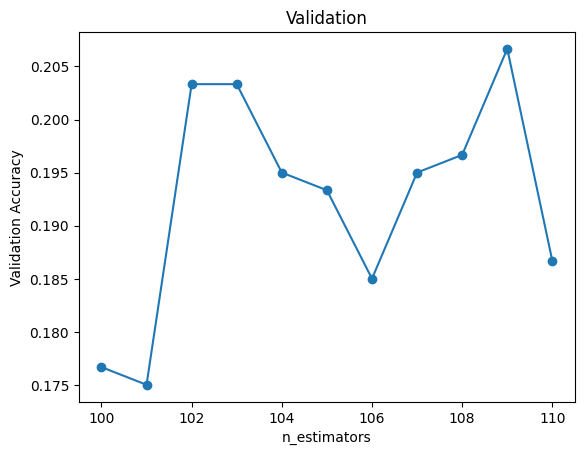

In [31]:
# rfc / color histogram / validation accuracy

k_values = []
accuracy = []

for i in range(100,111):
    t_0 = time.time()
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(x_CH, y_CH)
    pred = rfc.predict(validation_x_CH)
    acc = rfc.score(validation_x_CH, validation_y_CH)
    f1 = f1_score(validation_y_CH, pred, average='weighted')
    t_1 = time.time()
    t = t_1 - t_0
    print(f' n_estimators = {i:<3} ; validation accuracy = {acc:.4f} ; f1_acc = {f1:.4f} ; time = {t:.4f} (s)')
    k_values.append(i)
    accuracy.append(acc)

plt.plot(k_values, accuracy, marker='o', linestyle='-')
plt.title('Validation')
plt.xlabel('n_estimators')
plt.ylabel('Validation Accuracy')
plt.show()

In [34]:
# rfc / color histogram / test accuracy
# a 根據 val acc

a = [102, 103, 109]
for i in a:
    t_0 = time.time()
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(x_CH, y_CH)
    pred = rfc.predict(test_x_CH)
    acc = rfc.score(test_x_CH, test_y_CH)
    f1 = f1_score(test_y_CH, pred, average='weighted')
    t_1 = time.time()
    t = t_1 - t_0
    print(f' n_estimators = {i:<3} ; test accuracy = {acc:.4f} ; f1_acc = {f1:.4f} ; time = {t:.4f} (s)')

 n_estimators = 102 ; test accuracy = 0.1500 ; f1_acc = 0.1083 ; time = 6.1965 (s)
 n_estimators = 103 ; test accuracy = 0.1500 ; f1_acc = 0.0783 ; time = 6.2610 (s)
 n_estimators = 109 ; test accuracy = 0.1500 ; f1_acc = 0.1000 ; time = 6.6489 (s)


In [12]:
# SVM / color histogram / test

for i in range(1, 5):
    t_0 = time.time()
    clf = LinearSVC(random_state=0, tol=1e-5, C = i, max_iter=2000)
    clf.fit(x_CH, y_CH)
    pred = clf.predict(test_x_CH)
    acc = clf.score(test_x_CH, test_y_CH)
    f1 = f1_score(test_y_CH, pred, average='weighted')
    t_1 = time.time()
    t = t_1 - t_0
    print(f'C = {i} ; test accuracy = {acc:.4f} ; f1_acc = {f1:.4f} ; time = {t:.4f} (s)')

C:\Users\a0972\anaconda3\envs\tf37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


C = 1 ; test accuracy = 0.1000 ; f1_acc = 0.0559 ; time = 155.7161 (s)


C:\Users\a0972\anaconda3\envs\tf37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


C = 2 ; test accuracy = 0.0000 ; f1_acc = 0.0000 ; time = 155.4518 (s)


C:\Users\a0972\anaconda3\envs\tf37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


C = 3 ; test accuracy = 0.0500 ; f1_acc = 0.0053 ; time = 155.5623 (s)
C = 4 ; test accuracy = 0.0500 ; f1_acc = 0.0053 ; time = 155.6963 (s)


C:\Users\a0972\anaconda3\envs\tf37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [13]:
# SVM / SIFT / test

for i in range(1, 5):
    t_0 = time.time()
    clf = LinearSVC(random_state=0, tol=1e-5, C = i, max_iter=2000)
    clf.fit(x_SIFT, y_SIFT)
    pred = clf.predict(test_x_SIFT)
    acc = clf.score(test_x_SIFT, test_y_SIFT)
    f1 = f1_score(test_y_SIFT, pred, average='weighted')
    t_1 = time.time()
    t = t_1 - t_0
    print(f'C = {i} ; test accuracy = {acc:.4f} ; f1_acc = {f1:.4f} ; time = {t:.4f} (s)')

C:\Users\a0972\anaconda3\envs\tf37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


C = 1 ; test accuracy = 0.1500 ; f1_acc = 0.0917 ; time = 5140.5214 (s)


C:\Users\a0972\anaconda3\envs\tf37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


C = 2 ; test accuracy = 0.1500 ; f1_acc = 0.0917 ; time = 5194.4548 (s)


C:\Users\a0972\anaconda3\envs\tf37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


C = 3 ; test accuracy = 0.1500 ; f1_acc = 0.0917 ; time = 4977.4659 (s)
C = 4 ; test accuracy = 0.1500 ; f1_acc = 0.0917 ; time = 4876.8647 (s)


C:\Users\a0972\anaconda3\envs\tf37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [14]:
# SVM / BRISK / test

for i in range(1, 5):
    t_0 = time.time()
    clf = LinearSVC(random_state=0, tol=1e-5, C = i, max_iter=2000)
    clf.fit(x_BRISK, y_BRISK)
    pred = clf.predict(test_x_BRISK)
    acc = clf.score(test_x_BRISK, test_y_BRISK)
    f1 = f1_score(test_y_BRISK, pred, average='weighted')
    t_1 = time.time()
    t = t_1 - t_0
    print(f'C = {i} ; test accuracy = {acc:.4f} ; f1_acc = {f1:.4f} ; time = {t:.4f} (s)')

C:\Users\a0972\anaconda3\envs\tf37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


C = 1 ; test accuracy = 0.1500 ; f1_acc = 0.1083 ; time = 1057.8319 (s)


C:\Users\a0972\anaconda3\envs\tf37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


C = 2 ; test accuracy = 0.1500 ; f1_acc = 0.1083 ; time = 1056.3152 (s)


C:\Users\a0972\anaconda3\envs\tf37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


C = 3 ; test accuracy = 0.1500 ; f1_acc = 0.1083 ; time = 1056.4117 (s)
C = 4 ; test accuracy = 0.1500 ; f1_acc = 0.1083 ; time = 1058.1167 (s)


C:\Users\a0972\anaconda3\envs\tf37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


C:\Users\a0972\anaconda3\envs\tf37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


 C = 1   ; validation accuracy = 0.0550 ; f1_acc = 0.0210 ; time = 155.4747 (s)


C:\Users\a0972\anaconda3\envs\tf37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


 C = 2   ; validation accuracy = 0.0683 ; f1_acc = 0.0227 ; time = 155.3991 (s)


C:\Users\a0972\anaconda3\envs\tf37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


 C = 3   ; validation accuracy = 0.0617 ; f1_acc = 0.0132 ; time = 155.3800 (s)
 C = 4   ; validation accuracy = 0.0617 ; f1_acc = 0.0132 ; time = 155.4289 (s)


C:\Users\a0972\anaconda3\envs\tf37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


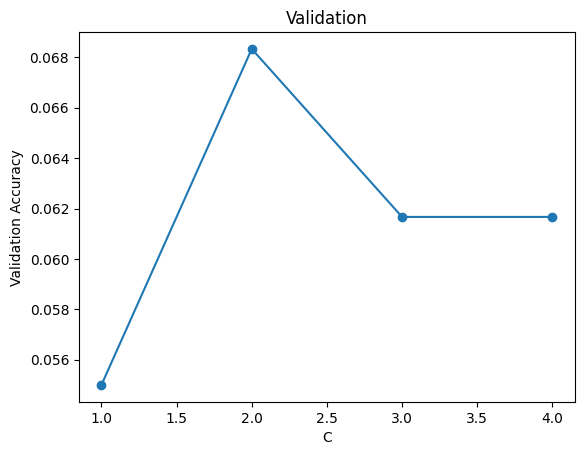

In [15]:
# SVM / color histogram / validation

k_values = []
accuracy = []

for i in range(1,5):
    t_0 = time.time()
    clf = LinearSVC(random_state=0, tol=1e-5, C = i, max_iter=2000)
    clf.fit(x_CH, y_CH)
    pred = clf.predict(validation_x_CH)
    acc = clf.score(validation_x_CH, validation_y_CH)
    f1 = f1_score(validation_y_CH, pred, average='weighted')
    t_1 = time.time()
    t = t_1 - t_0
    print(f' C = {i:<3} ; validation accuracy = {acc:.4f} ; f1_acc = {f1:.4f} ; time = {t:.4f} (s)')
    k_values.append(i)
    accuracy.append(acc)

plt.plot(k_values, accuracy, marker='o', linestyle='-')
plt.title('Validation')
plt.xlabel('C')
plt.ylabel('Validation Accuracy')
plt.show()

C:\Users\a0972\anaconda3\envs\tf37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


 C = 1   ; validation accuracy = 0.1029 ; f1_acc = 0.0901 ; time = 5220.9104 (s)


C:\Users\a0972\anaconda3\envs\tf37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


 C = 2   ; validation accuracy = 0.1029 ; f1_acc = 0.0899 ; time = 5149.0925 (s)


C:\Users\a0972\anaconda3\envs\tf37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


 C = 3   ; validation accuracy = 0.1012 ; f1_acc = 0.0890 ; time = 4912.6564 (s)
 C = 4   ; validation accuracy = 0.1029 ; f1_acc = 0.0897 ; time = 4912.8404 (s)


C:\Users\a0972\anaconda3\envs\tf37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


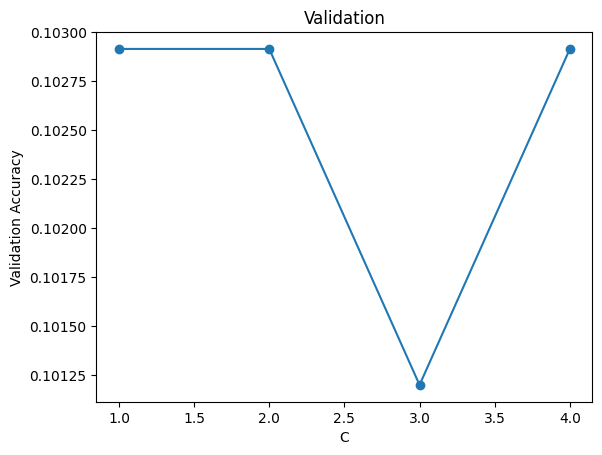

In [16]:
# SVM / SIFT / validation

k_values = []
accuracy = []

for i in range(1,5):
    t_0 = time.time()
    clf = LinearSVC(random_state=0, tol=1e-5, C = i, max_iter=2000)
    clf.fit(x_SIFT, y_SIFT)
    pred = clf.predict(validation_x_SIFT)
    acc = clf.score(validation_x_SIFT, validation_y_SIFT)
    f1 = f1_score(validation_y_SIFT, pred, average='weighted')
    t_1 = time.time()
    t = t_1 - t_0
    print(f' C = {i:<3} ; validation accuracy = {acc:.4f} ; f1_acc = {f1:.4f} ; time = {t:.4f} (s)')
    k_values.append(i)
    accuracy.append(acc)

plt.plot(k_values, accuracy, marker='o', linestyle='-')
plt.title('Validation')
plt.xlabel('C')
plt.ylabel('Validation Accuracy')
plt.show()

C:\Users\a0972\anaconda3\envs\tf37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


 C = 1   ; validation accuracy = 0.0878 ; f1_acc = 0.0813 ; time = 1063.7084 (s)


C:\Users\a0972\anaconda3\envs\tf37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


 C = 2   ; validation accuracy = 0.0918 ; f1_acc = 0.0835 ; time = 1053.6011 (s)


C:\Users\a0972\anaconda3\envs\tf37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


 C = 3   ; validation accuracy = 0.0878 ; f1_acc = 0.0792 ; time = 1051.6741 (s)
 C = 4   ; validation accuracy = 0.0816 ; f1_acc = 0.0766 ; time = 1050.9083 (s)


C:\Users\a0972\anaconda3\envs\tf37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


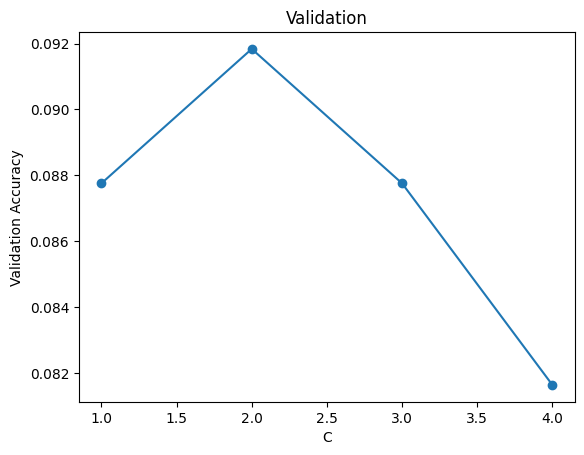

In [18]:
# SVM / BRISK / validation

k_values = []
accuracy = []

for i in range(1,5):
    t_0 = time.time()
    clf = LinearSVC(random_state=0, tol=1e-5, C = i, max_iter=2000)
    clf.fit(x_BRISK, y_BRISK)
    pred = clf.predict(validation_x_BRISK)
    acc = clf.score(validation_x_BRISK, validation_y_BRISK)
    f1 = f1_score(validation_y_BRISK, pred, average='weighted')
    t_1 = time.time()
    t = t_1 - t_0
    print(f' C = {i:<3} ; validation accuracy = {acc:.4f} ; f1_acc = {f1:.4f} ; time = {t:.4f} (s)')
    k_values.append(i)
    accuracy.append(acc)

plt.plot(k_values, accuracy, marker='o', linestyle='-')
plt.title('Validation')
plt.xlabel('C')
plt.ylabel('Validation Accuracy')
plt.show()